# Distributions - R

## Normal Distribution

* **Parameterization:** mean (μ): `mean`, standard deviation (σ): `sd`
* **Distribution Functions:** `_norm`: `dnorm`, `pnorm`, `qnorm`, `rnorm`
* **Reporting:** "Figure 2 shows the distributions of response Y for both levels of factor X. To test whether these distributions were normally distributed, a Kolmogorov-Smirnov test was run on Y for both levels of X. The test for level ‘a’ was statistically non-significant (D = .158, p = .404), as was the test for level ‘b’ (D = .104, p = .867), indicating non-detectable deviations from a normal distribution for both levels."

In [1]:
# Example data
# df has one factor (X) w/two levels (a,b) and continuous response Y
df <- read.csv("data/1F2LBs_normal.csv")
head(df, 20)

,S,X,Y
,<int>,<chr>,<dbl>
1,1,a,10.055297
2,2,b,11.462669
3,3,a,12.140244
4,4,b,14.025322
5,5,a,6.922079
6,6,b,16.523659
7,7,a,7.350582
8,8,b,13.416170
9,9,a,11.279275


In [2]:
library(MASS) # for fitdistr
fa = fitdistr(df[df$X == "a",]$Y, "normal")$estimate # create fit for X.a
ks.test(df[df$X == "a",]$Y, "pnorm", mean=fa[1], sd=fa[2])
fb = fitdistr(df[df$X == "b",]$Y, "normal")$estimate # create fit for X.b
ks.test(df[df$X == "b",]$Y, "pnorm", mean=fb[1], sd=fb[2])


	Exact one-sample Kolmogorov-Smirnov test

data:  df[df$X == "a", ]$Y
D = 0.15752, p-value = 0.4042
alternative hypothesis: two-sided



	Exact one-sample Kolmogorov-Smirnov test

data:  df[df$X == "b", ]$Y
D = 0.10418, p-value = 0.8674
alternative hypothesis: two-sided


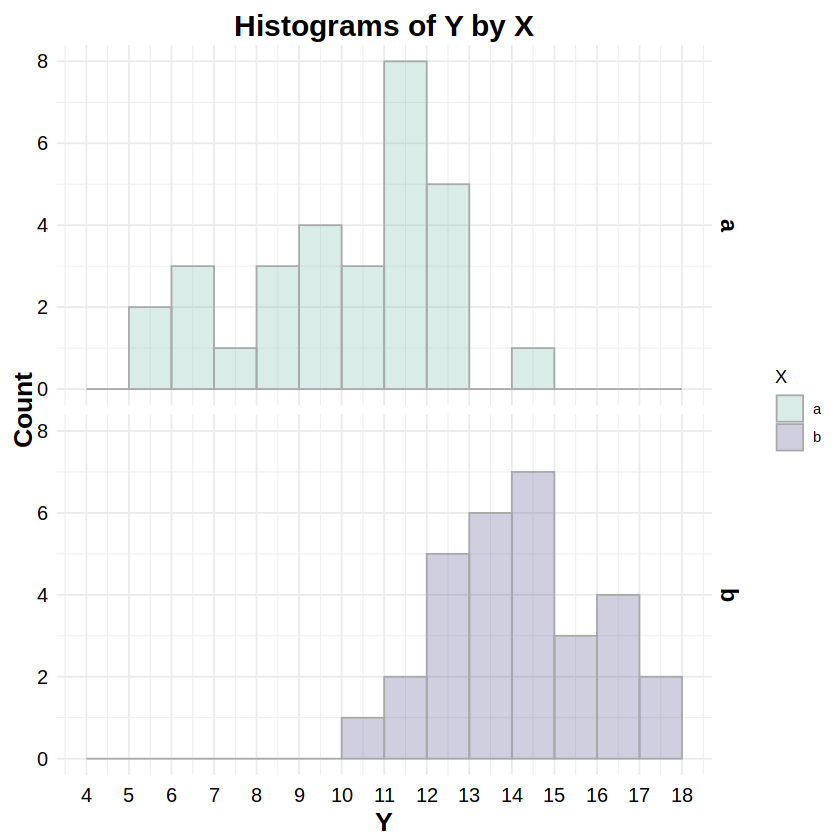

In [4]:
library(ggplot2)
library(ggthemes)
library(scales)

# Histograms
# http://www.sthda.com/english/wiki/ggplot2-histogram-plot-quick-start-guide-r-software-and-data-visualization
ggplot(data=df, aes(x=Y, col=X, fill=X)) + theme_minimal() + 
  # set the font styles for the plot title and axis titles
  theme(plot.title   = element_text(face="bold",  color="black", size=18, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.x = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.y = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=90)) + 
  # set the font styles for the value labels that show on each axis
  theme(axis.text.x  = element_text(face="plain", color="black", size=12, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.text.y  = element_text(face="plain", color="black", size=12, hjust=0.0, vjust=0.5, angle=0)) + 
  # set the font style for the facet labels
  theme(strip.text = element_text(face="bold", color="black", size=14, hjust=0.5)) + 
  # create the histogram; the alpha value ensures overlaps can be seen
  geom_histogram(color="darkgray", binwidth=1, breaks=seq(4,18,by=1), alpha=0.25, position="identity") + 
  # create stacked plots by X, one for each histogram
  facet_grid(X ~ .) + 
  # determine the fill color values of each histogram
  scale_fill_manual(values=c("#69b3a2","#404080")) + 
  # set the labels for the title and each axis
  labs(title="Histograms of Y by X", x="Y", y="Count") + 
  # set the ranges and value labels for each axis
  scale_x_continuous(breaks=seq(4,18,by=1), labels=seq(4,18,by=1), limits=c(4,18)) +
  scale_y_continuous(breaks=seq(0,8,by=2), labels=seq(0,8,by=2), limits=c(0,8))

## Lognormal Distribution

* **Parameterization:** mean (μ): `meanlog`, standard deviation (σ): `sdlog`
* **Distribution Functions:** `_lnorm`: `dlnorm`, `plnorm`, `qlnorm`, `rlnorm`
* **Reporting:** "Figure 3 shows the distributions of response Y for both levels of factor X. To test whether these distributions were lognormally distributed, a Kolmogorov-Smirnov test was run on Y for both levels of X. The test for level ‘a’ was statistically non-significant (D = .096, p = .918), as was the test for level ‘b’ (D = .161, p = .375), indicating non-detectable deviations from a lognormal distribution for both levels."

In [5]:
# Example data
# df has one factor (X) w/two levels (a,b) and continuous response Y
df <- read.csv("data/1F2LBs_lognormal.csv")
head(df, 20)

,S,X,Y
,<int>,<chr>,<dbl>
1,1,a,18.308269
2,2,b,5.951342
3,3,a,5.739954
4,4,b,5.932270
5,5,a,21.378222
6,6,b,25.155509
7,7,a,20.848274
8,8,b,6.533354
9,9,a,8.683973


In [6]:
library(MASS) # for fitdistr
fa = fitdistr(df[df$X == "a",]$Y, "lognormal")$estimate # create fit for X.a
ks.test(df[df$X == "a",]$Y, "plnorm", meanlog=fa[1], sdlog=fa[2])
fb = fitdistr(df[df$X == "b",]$Y, "lognormal")$estimate # create fit for X.b
ks.test(df[df$X == "b",]$Y, "plnorm", meanlog=fb[1], sdlog=fb[2])


	Exact one-sample Kolmogorov-Smirnov test

data:  df[df$X == "a", ]$Y
D = 0.0964, p-value = 0.918
alternative hypothesis: two-sided



	Exact one-sample Kolmogorov-Smirnov test

data:  df[df$X == "b", ]$Y
D = 0.16135, p-value = 0.3752
alternative hypothesis: two-sided


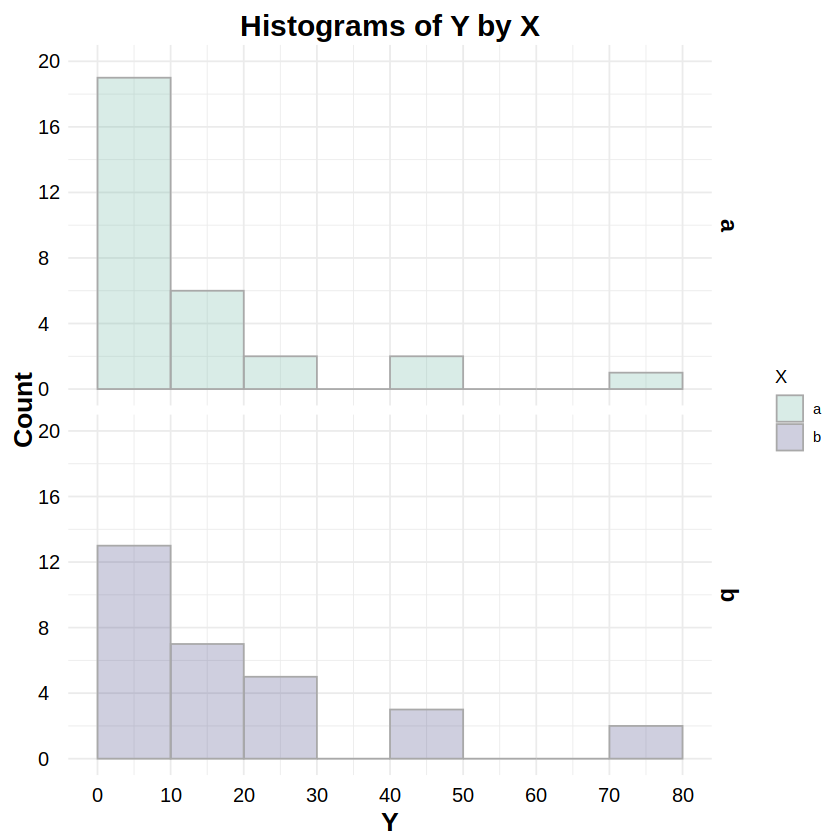

In [7]:
library(ggplot2)
library(ggthemes)
library(scales)

# Plot lognormal histograms
# http://www.sthda.com/english/wiki/ggplot2-histogram-plot-quick-start-guide-r-software-and-data-visualization
ggplot(data=df, aes(x=Y, col=X, fill=X)) + theme_minimal() + 
  # set the font styles for the plot title and axis titles
  theme(plot.title   = element_text(face="bold",  color="black", size=18, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.x = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.y = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=90)) + 
  # set the font styles for the value labels that show on each axis
  theme(axis.text.x  = element_text(face="plain", color="black", size=12, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.text.y  = element_text(face="plain", color="black", size=12, hjust=0.0, vjust=0.5, angle=0)) + 
  # set the font style for the facet labels
  theme(strip.text = element_text(face="bold", color="black", size=14, hjust=0.5)) + 
  # create the histogram; the alpha value ensures overlaps can be seen
  geom_histogram(color="darkgray", binwidth=10, breaks=seq(0,80,by=10), alpha=0.25, position="identity") + 
  # create stacked plots by X, one for each histogram
  facet_grid(X ~ .) + 
  # determine the fill color values of each histogram
  scale_fill_manual(values=c("#69b3a2","#404080")) + 
  # set the labels for the title and each axis
  labs(title="Histograms of Y by X", x="Y", y="Count") + 
  # set the ranges and value labels for each axis
  scale_x_continuous(breaks=seq(0,80,by=10), labels=seq(0,80,by=10), limits=c(0,80)) +
  scale_y_continuous(breaks=seq(0,20,by=4), labels=seq(0,20,by=4), limits=c(0,20))

## Poisson Distribution

* **Parameterization:** lambda (λ): `lambda`
* **Distribution Functions:** `_pois`: `dpois`, `ppois`, `qpois`, `rpois`
* **Reporting:** "Figure 4 shows the distributions of response Y for both levels of factor X. To test whether these distributionswere Poisson distributed, a Chi-Squared goodness-of-fit test was run on Y for both levels of X. The test for level ‘a’ was statistically non-significant (χ2(3, N=30) = 2.62, p = .454), as was the test for level ‘b’ (χ2(4, N=30) = 2.79, p = .593), indicating non-detectable deviations from a Poisson distribution for both levels."

In [8]:
# Example data
# df has one factor (X) w/two levels (a,b) and nonnegative integer response Y
df <- read.csv("data/1F2LBs_poisson.csv")
head(df, 20)

,S,X,Y
,<int>,<chr>,<int>
1,1,a,5
2,2,b,6
3,3,a,3
4,4,b,3
5,5,a,3
6,6,b,5
7,7,a,5
8,8,b,7
9,9,a,2


In [11]:
library(fitdistrplus) # for fitdist, gofstat
fa = fitdist(df[df$X == "a",]$Y, "pois") # create fit for X.a
gofstat(fa)
fb = fitdist(df[df$X == "b",]$Y, "pois") # create fit for X.b
gofstat(fb)

Loading required package: survival



Chi-squared statistic:  2.619401 
Degree of freedom of the Chi-squared distribution:  3 
Chi-squared p-value:  0.4540985 
   the p-value may be wrong with some theoretical counts < 5  
Chi-squared table:
     obscounts theocounts
<= 1  5.000000   7.280252
<= 2 10.000000   7.284586
<= 3  5.000000   6.637067
<= 4  6.000000   4.535329
> 4   4.000000   4.262765

Goodness-of-fit criteria
                               1-mle-pois
Akaike's Information Criterion   112.8951
Bayesian Information Criterion   114.2962

Chi-squared statistic:  2.794443 
Degree of freedom of the Chi-squared distribution:  4 
Chi-squared p-value:  0.5927924 
   the p-value may be wrong with some theoretical counts < 5  
Chi-squared table:
     obscounts theocounts
<= 2  4.000000   5.436500
<= 3  6.000000   5.173554
<= 4  5.000000   5.734022
<= 5  6.000000   5.084166
<= 6  6.000000   3.756634
> 6   3.000000   4.815124

Goodness-of-fit criteria
                               1-mle-pois
Akaike's Information Criterion   121.0369
Bayesian Information Criterion   122.4381

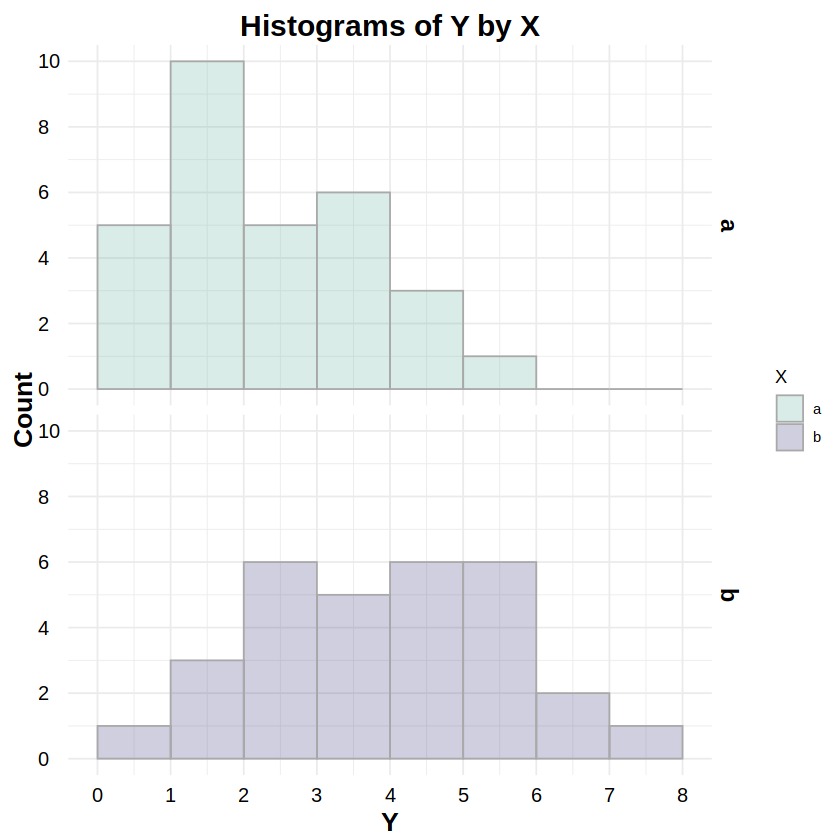

In [12]:
library(ggplot2)
library(ggthemes)
library(scales)

# Plot Poisson histograms
# http://www.sthda.com/english/wiki/ggplot2-histogram-plot-quick-start-guide-r-software-and-data-visualization
ggplot(data=df, aes(x=Y, col=X, fill=X)) + theme_minimal() + 
  # set the font styles for the plot title and axis titles
  theme(plot.title   = element_text(face="bold",  color="black", size=18, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.x = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.y = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=90)) + 
  # set the font styles for the value labels that show on each axis
  theme(axis.text.x  = element_text(face="plain", color="black", size=12, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.text.y  = element_text(face="plain", color="black", size=12, hjust=0.0, vjust=0.5, angle=0)) + 
  # set the font style for the facet labels
  theme(strip.text = element_text(face="bold", color="black", size=14, hjust=0.5)) + 
  # create the histogram; the alpha value ensures overlaps can be seen
  geom_histogram(color="darkgray", binwidth=1, breaks=seq(0,8,by=1), alpha=0.25, position="identity") + 
  # create stacked plots by X, one for each histogram
  facet_grid(X ~ .) + 
  # determine the fill color values of each histogram
  scale_fill_manual(values=c("#69b3a2","#404080")) + 
  # set the labels for the title and each axis
  labs(title="Histograms of Y by X", x="Y", y="Count") + 
  # set the ranges and value labels for each axis
  scale_x_continuous(breaks=seq(0,8,by=1), labels=seq(0,8,by=1), limits=c(0,8)) +
  scale_y_continuous(breaks=seq(0,10,by=2), labels=seq(0,10,by=2), limits=c(0,10))

## Negative Binomial Distribution

* **Parameterization:** theta (θ): `theta`, mu (μ): `mu`
* **Distribution Functions:** `_nbinom`: `dnbinom`, `pnbinom`, `qnbinom`, `rnbinom`
* **Reporting:** "Figure 5 shows the distributions of response Y for both levels of factor X. To test whether these distributions were negative binomially distributed, a Chi-Squared goodness-of-fit test was run on Y for both levels of X. The test for level ‘a’ was statistically non-significant (χ2(4, N=30) = 1.74, p = .783), as was the test for level ‘b’ (χ2(3, N=30) = 1.27, p = .737), indicating non-detectable deviations from a negative binomial distribution for both levels."

In [13]:
# Example data
# df has one factor (X) w/two levels (a,b) and nonnegative integer response Y
df <- read.csv("data/1F2LBs_negbin.csv")
head(df, 20)

,S,X,Y
,<int>,<chr>,<int>
1,1,a,22
2,2,b,11
3,3,a,16
4,4,b,9
5,5,a,8
6,6,b,16
7,7,a,13
8,8,b,4
9,9,a,18


In [14]:
library(fitdistrplus) # for fitdist, gofstat
fa = fitdist(df[df$X == "a",]$Y, "nbinom") # create fit for X.a
gofstat(fa)
fb = fitdist(df[df$X == "b",]$Y, "nbinom") # create fit for X.b
gofstat(fb)

Chi-squared statistic:  1.73975 
Degree of freedom of the Chi-squared distribution:  4 
Chi-squared p-value:  0.7834849 
   the p-value may be wrong with some theoretical counts < 5  
Chi-squared table:
      obscounts theocounts
<= 7   5.000000   3.498637
<= 11  4.000000   5.021527
<= 14  5.000000   4.274380
<= 18  4.000000   5.293625
<= 23  4.000000   5.056978
<= 28  4.000000   3.214631
> 28   4.000000   3.640223

Goodness-of-fit criteria
                               1-mle-nbinom
Akaike's Information Criterion     217.6756
Bayesian Information Criterion     220.4780

Chi-squared statistic:  1.268287 
Degree of freedom of the Chi-squared distribution:  3 
Chi-squared p-value:  0.736677 
   the p-value may be wrong with some theoretical counts < 5  
Chi-squared table:
      obscounts theocounts
<= 5   4.000000   3.954289
<= 8   6.000000   5.716970
<= 10  4.000000   4.235641
<= 13  4.000000   5.710654
<= 16  6.000000   4.245423
> 16   6.000000   6.137024

Goodness-of-fit criteria
                               1-mle-nbinom
Akaike's Information Criterion     194.1103
Bayesian Information Criterion     196.9126

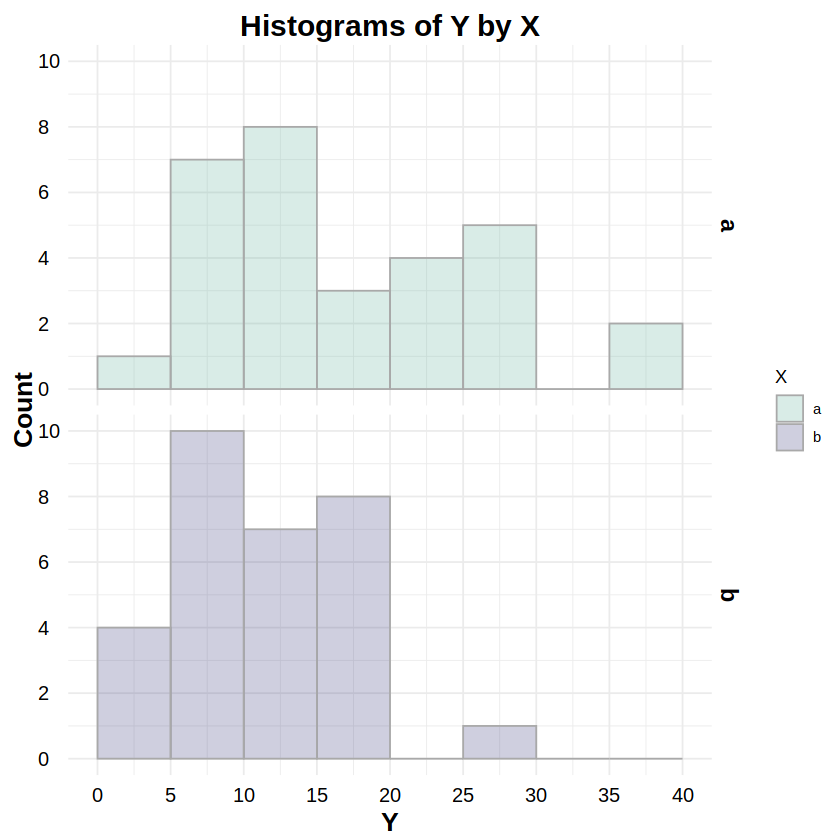

In [15]:
library(ggplot2)
library(ggthemes)
library(scales)

# Plot negative binomial histograms
# http://www.sthda.com/english/wiki/ggplot2-histogram-plot-quick-start-guide-r-software-and-data-visualization
ggplot(data=df, aes(x=Y, col=X, fill=X)) + theme_minimal() + 
  # set the font styles for the plot title and axis titles
  theme(plot.title   = element_text(face="bold",  color="black", size=18, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.x = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.y = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=90)) + 
  # set the font styles for the value labels that show on each axis
  theme(axis.text.x  = element_text(face="plain", color="black", size=12, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.text.y  = element_text(face="plain", color="black", size=12, hjust=0.0, vjust=0.5, angle=0)) + 
  # set the font style for the facet labels
  theme(strip.text = element_text(face="bold", color="black", size=14, hjust=0.5)) + 
  # create the histogram; the alpha value ensures overlaps can be seen
  geom_histogram(color="darkgray", binwidth=5, breaks=seq(0,40,by=5), alpha=0.25, position="identity") + 
  # create stacked plots by X, one for each histogram
  facet_grid(X ~ .) + 
  # determine the fill color values of each histogram
  scale_fill_manual(values=c("#69b3a2","#404080")) + 
  # set the labels for the title and each axis
  labs(title="Histograms of Y by X", x="Y", y="Count") + 
  # set the ranges and value labels for each axis
  scale_x_continuous(breaks=seq(0,40,by=5), labels=seq(0,40,by=5), limits=c(0,40)) +
  scale_y_continuous(breaks=seq(0,10,by=2), labels=seq(0,10,by=2), limits=c(0,10))

## Exponential Distribution

* **Parameterization:** rate (λ): `rate`
* **Distribution Functions:** `_exp`: `dexp`, `pexp`, `qexp`, `rexp`
* **Reporting:** "Figure 6 shows the distributions of response Y for both levels of factor X. To test whether these distributions were exponentially distributed, a Kolmogorov-Smirnov test was run on Y for both levels of X. The test for level ‘a’ was statistically non-significant (D = .107, p = .849), as was the test for level ‘b’ (D = .119, p = .742), indicating non-detectable deviations from an exponential distribution for both levels."

In [16]:
# Example data
# df has one factor (X) w/two levels (a,b) and continuous response Y
df <- read.csv("data/1F2LBs_exponential.csv")
head(df, 20)

,S,X,Y
,<int>,<chr>,<dbl>
1,1,a,12.477962
2,2,b,5.975198
3,3,a,7.781088
4,4,b,16.940324
5,5,a,10.526902
6,6,b,4.675437
7,7,a,9.899636
8,8,b,23.608037
9,9,a,2.041000


In [17]:
library(MASS) # for fitdistr
fa = fitdistr(df[df$X == "a",]$Y, "exponential")$estimate # create fit for X.a
ks.test(df[df$X == "a",]$Y, "pexp", rate=fa[1])
fb = fitdistr(df[df$X == "b",]$Y, "exponential")$estimate # create fit for X.b
ks.test(df[df$X == "b",]$Y, "pexp", rate=fb[1])


	Exact one-sample Kolmogorov-Smirnov test

data:  df[df$X == "a", ]$Y
D = 0.10665, p-value = 0.8491
alternative hypothesis: two-sided



	Exact one-sample Kolmogorov-Smirnov test

data:  df[df$X == "b", ]$Y
D = 0.11942, p-value = 0.7415
alternative hypothesis: two-sided


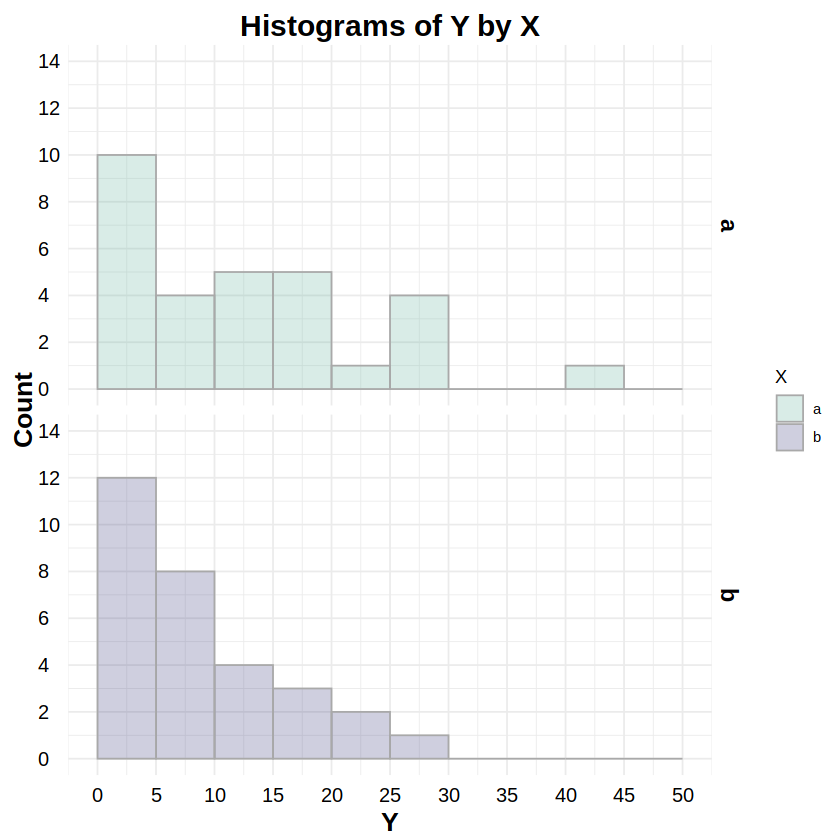

In [18]:
library(ggplot2)
library(ggthemes)
library(scales)

# Plot exponential histograms
# http://www.sthda.com/english/wiki/ggplot2-histogram-plot-quick-start-guide-r-software-and-data-visualization
ggplot(data=df, aes(x=Y, col=X, fill=X)) + theme_minimal() + 
  # set the font styles for the plot title and axis titles
  theme(plot.title   = element_text(face="bold",  color="black", size=18, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.x = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.y = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=90)) + 
  # set the font styles for the value labels that show on each axis
  theme(axis.text.x  = element_text(face="plain", color="black", size=12, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.text.y  = element_text(face="plain", color="black", size=12, hjust=0.0, vjust=0.5, angle=0)) + 
  # set the font style for the facet labels
  theme(strip.text = element_text(face="bold", color="black", size=14, hjust=0.5)) + 
  # create the histogram; the alpha value ensures overlaps can be seen
  geom_histogram(color="darkgray", binwidth=5, breaks=seq(0,50,by=5), alpha=0.25, position="identity") + 
  # create stacked plots by X, one for each histogram
  facet_grid(X ~ .) + 
  # determine the fill color values of each histogram
  scale_fill_manual(values=c("#69b3a2","#404080")) + 
  # set the labels for the title and each axis
  labs(title="Histograms of Y by X", x="Y", y="Count") + 
  # set the ranges and value labels for each axis
  scale_x_continuous(breaks=seq(0,50,by=5), labels=seq(0,50,by=5), limits=c(0,50)) +
  scale_y_continuous(breaks=seq(0,14,by=2), labels=seq(0,14,by=2), limits=c(0,14))

## Gamma Distribution

* **Parameterization:** shape (α): `shape`, rate (β): `rate`
* **Distribution Functions:** `_gamma`: `dgamma`, `pgamma`, `qgamma`, `rgamma`
* **Reporting:** "Figure 7 shows the distributions of response Y for both levels of factor X. To test whether these distributions were Gamma distributed, a Kolmogorov-Smirnov test was run on Y for both levels of X. The test for level ‘a’ was statistically non-significant (D = .116, p = .773), as was the test for level ‘b’ (D = .143, p = .526), indicating non-detectable deviations from a Gamma distribution for both levels."

In [19]:
# Example data
# df has one factor (X) w/two levels (a,b) and continuous response Y
df <- read.csv("data/1F2LBs_gamma.csv")
head(df, 20)

,S,X,Y
,<int>,<chr>,<dbl>
1,1,a,10.345366
2,2,b,1.409266
3,3,a,6.433979
4,4,b,3.092545
5,5,a,3.943187
6,6,b,2.696895
7,7,a,4.507424
8,8,b,2.838128
9,9,a,5.451457


In [20]:
library(MASS) # for fitdistr
fa = fitdistr(df[df$X == "a",]$Y, "gamma")$estimate # create fit for X.a
ks.test(df[df$X == "a",]$Y, "pgamma", shape=fa[1], rate=fa[2])
fb = fitdistr(df[df$X == "b",]$Y, "gamma")$estimate # create fit for X.b
ks.test(df[df$X == "b",]$Y, "pgamma", shape=fb[1], rate=fb[2])


	Exact one-sample Kolmogorov-Smirnov test

data:  df[df$X == "a", ]$Y
D = 0.11585, p-value = 0.7732
alternative hypothesis: two-sided



	Exact one-sample Kolmogorov-Smirnov test

data:  df[df$X == "b", ]$Y
D = 0.14293, p-value = 0.5258
alternative hypothesis: two-sided


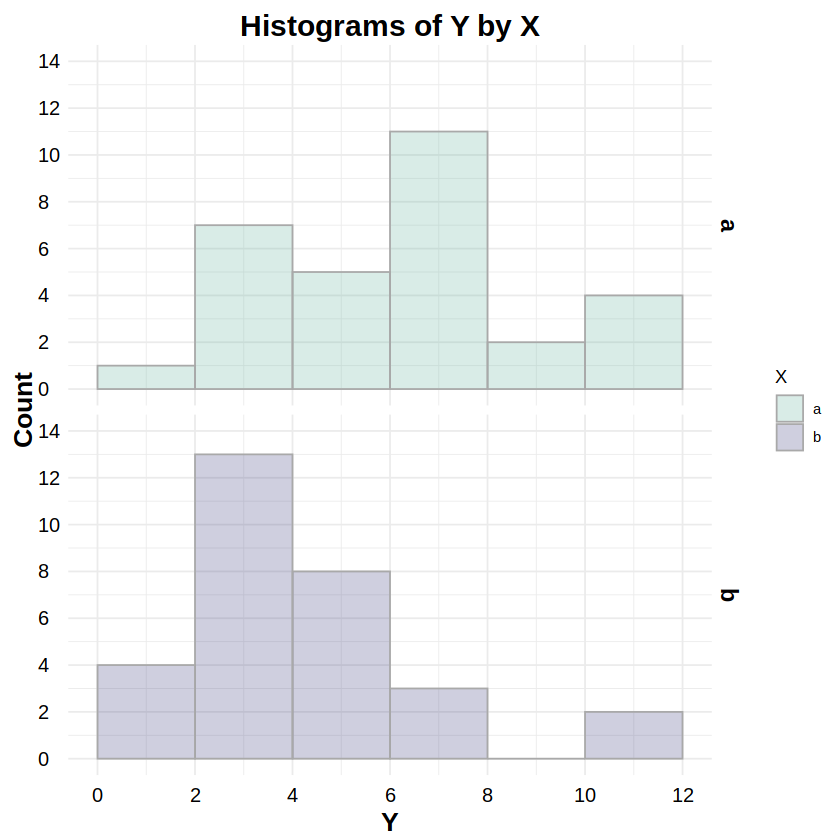

In [21]:
library(ggplot2)
library(ggthemes)
library(scales)

# Plot gamma histograms
# http://www.sthda.com/english/wiki/ggplot2-histogram-plot-quick-start-guide-r-software-and-data-visualization
ggplot(data=df, aes(x=Y, col=X, fill=X)) + theme_minimal() + 
  # set the font styles for the plot title and axis titles
  theme(plot.title   = element_text(face="bold",  color="black", size=18, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.x = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.y = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=90)) + 
  # set the font styles for the value labels that show on each axis
  theme(axis.text.x  = element_text(face="plain", color="black", size=12, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.text.y  = element_text(face="plain", color="black", size=12, hjust=0.0, vjust=0.5, angle=0)) + 
  # set the font style for the facet labels
  theme(strip.text = element_text(face="bold", color="black", size=14, hjust=0.5)) + 
  # create the histogram; the alpha value ensures overlaps can be seen
  geom_histogram(color="darkgray", binwidth=2, breaks=seq(0,12,by=2), alpha=0.25, position="identity") + 
  # create stacked plots by X, one for each histogram
  facet_grid(X ~ .) + 
  # determine the fill color values of each histogram
  scale_fill_manual(values=c("#69b3a2","#404080")) + 
  # set the labels for the title and each axis
  labs(title="Histograms of Y by X", x="Y", y="Count") + 
  # set the ranges and value labels for each axis
  scale_x_continuous(breaks=seq(0,12,by=2), labels=seq(0,12,by=2), limits=c(0,12)) +
  scale_y_continuous(breaks=seq(0,14,by=2), labels=seq(0,14,by=2), limits=c(0,14))